In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sms=pd.read_csv('https://raw.githubusercontent.com/training-ml/nlp/main/spam.csv',encoding='latin-1')

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [6]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
print(round(len(sms[sms.label=='ham'])/len(sms.label),2)*100,'%')
print(round(len(sms[sms.label=='spam'])/len(sms.label),2)*100,'%')

87.0 %
13.0 %


In [8]:
sms['length']=sms.message.str.len()
sms

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [9]:
sms['label'].replace({'ham':0,'spam':1},inplace=True)
sms

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [10]:
sms['message']=sms.message.str.lower()
sms

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161
5568,0,will ì_ b going to esplanade fr home?,37
5569,0,"pity, * was in mood for that. so...any other s...",57
5570,0,the guy did some bitching but i acted like i'd...,125


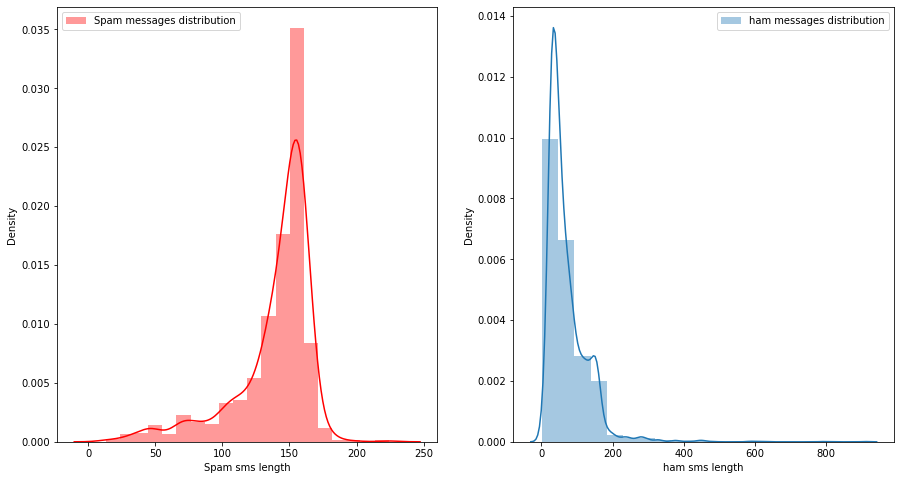

In [11]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

### Regular expressions

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(sms.message)):
    review=re.sub('[^a-zA-Z]',' ',sms['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [14]:
from nltk.stem import WordNetLemmatizer
lemmi=WordNetLemmatizer()
corpus1=[]
for i in range(0,len(sms.message)):
    review=re.sub('[^a-zA-Z]',' ',sms['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmi.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus1.append(review)
corpus1

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [15]:
sms['corpus']=corpus
sms['new_length']=sms.corpus.str.len()
sms['corpus1']=corpus1
sms['new_length1']=sms.corpus.str.len()
sms

,label,message,length,corpus,new_length,corpus1,new_length1
0,0,"go until jurong point, crazy.. available only ...",111,go jurong point crazi avail bugi n great world...,76,go jurong point crazy available bugis n great ...,76
1,0,ok lar... joking wif u oni...,29,ok lar joke wif u oni,21,ok lar joking wif u oni,21
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,free entri wkli comp win fa cup final tkt st m...,99,free entry wkly comp win fa cup final tkts st ...,99
3,0,u dun say so early hor... u c already then say...,49,u dun say earli hor u c alreadi say,35,u dun say early hor u c already say,35
4,0,"nah i don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,36,nah think go usf life around though,36
...,...,...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,nd time tri contact u u pound prize claim easi...,78,nd time tried contact u u pound prize claim ea...,78
5568,0,will ì_ b going to esplanade fr home?,37,b go esplanad fr home,21,b going esplanade fr home,21
5569,0,"pity, * was in mood for that. so...any other s...",57,piti mood suggest,17,pity mood suggestion,17
5570,0,the guy did some bitching but i acted like i'd...,125,guy bitch act like interest buy someth els nex...,65,guy bitching acted like interested buying some...,65


In [16]:
# Create Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
x.shape

(5572, 6221)

In [17]:
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(corpus).toarray()
x.shape

(5572, 5000)

In [18]:
# Create Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x1=cv.fit_transform(corpus1).toarray()
x1.shape

(5572, 7021)

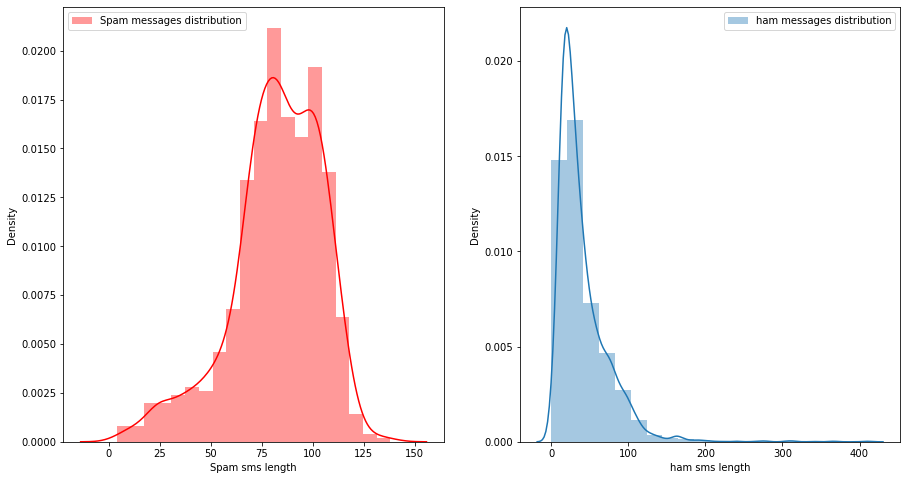

In [19]:

# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(sms[sms['label']==1]['new_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['new_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

In [20]:
y=sms.label

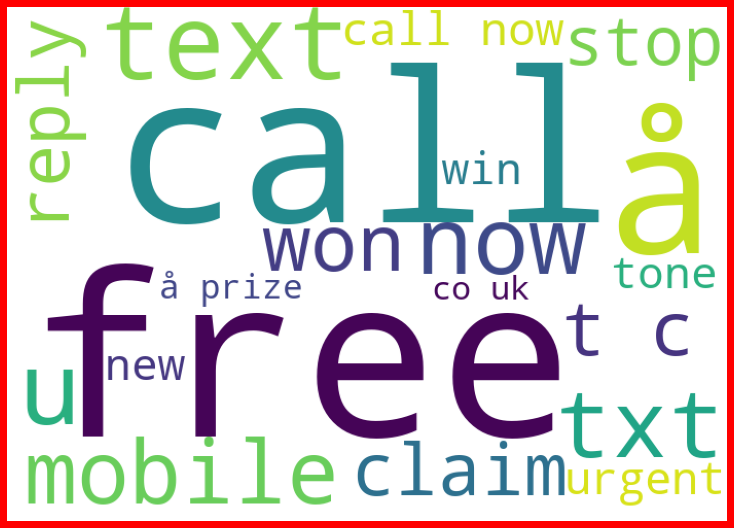

In [21]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = sms['message'][sms['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

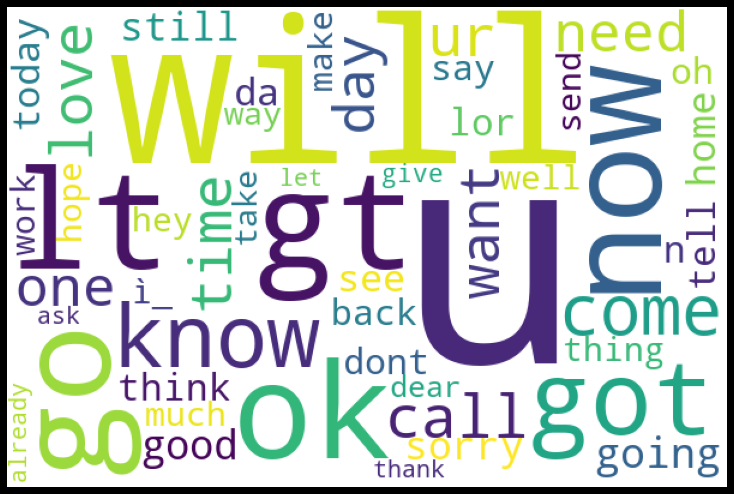

In [22]:
#Getting sense of loud words in ham 

hams = sms['message'][sms['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [24]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,random_state=0)

In [25]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x_train, y_train)
y_pred=spam_detect_model.predict(x_test)

In [26]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(x1_train, y_train)
y1_pred=spam_detect_model.predict(x1_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.94      0.96      0.95       166

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.98      0.98      1115

[[938  11]
 [  6 160]]
0.9847533632286996


In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))
print(accuracy_score(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.91      0.96      0.94       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[933  16]
 [  6 160]]
0.9802690582959641
